In [1]:
# ============================
# Import Dataset
# ============================
import pandas as pd
file_path = "sample_new_zealand. csv"
df = pd.read_csv(file_path)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime').reset_index(drop=True)
print(df)

            Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0     1976/01/15 -30.38 -176.82   33.0  6.2     196   26    91  06:06:46.1   
1     1976/01/15 -30.15 -177.24   33.0  6.1     180   10    73  16:12:22.3   
2     1976/05/04 -44.64  167.57   19.0  6.6      57   18   136  13:56:29.9   
3     1976/06/29 -33.82 -177.83   48.0  6.1      24   37    78  18:30:09.1   
4     1976/07/31 -30.32 -177.96   20.0  6.2     196   31    93  00:46:58.0   
...          ...    ...     ...    ...  ...     ...  ...   ...         ...   
1537  2020/11/29 -31.86  179.20  462.5  5.3     115   35  -178  21:45:22.7   
1538  2020/12/10 -32.88 -179.85   96.0  5.9     139   25   175  20:42:08.3   
1539  2020/12/11 -32.91 -179.05   43.5  5.1     206   34   104  15:30:00.1   
1540  2020/12/18 -32.64 -178.84   35.7  5.1     198   32    97  20:49:15.8   
1541  2020/12/24 -32.05 -178.10   10.0  5.1     197   28    77  20:04:11.8   

                    Datetime  
0    1976-01-15 06:06:46.100  
1

In [13]:
# ============================================
# Raw Data Distribution Before Declustering
# ============================================

In [2]:
# Calculate the interval time before declustering
df_compare = df.copy()
df_compare['inter_arrival'] = (df_compare['Datetime'].diff().dt.total_seconds())/86400
print(df_compare)

            Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0     1976/01/15 -30.38 -176.82   33.0  6.2     196   26    91  06:06:46.1   
1     1976/01/15 -30.15 -177.24   33.0  6.1     180   10    73  16:12:22.3   
2     1976/05/04 -44.64  167.57   19.0  6.6      57   18   136  13:56:29.9   
3     1976/06/29 -33.82 -177.83   48.0  6.1      24   37    78  18:30:09.1   
4     1976/07/31 -30.32 -177.96   20.0  6.2     196   31    93  00:46:58.0   
...          ...    ...     ...    ...  ...     ...  ...   ...         ...   
1537  2020/11/29 -31.86  179.20  462.5  5.3     115   35  -178  21:45:22.7   
1538  2020/12/10 -32.88 -179.85   96.0  5.9     139   25   175  20:42:08.3   
1539  2020/12/11 -32.91 -179.05   43.5  5.1     206   34   104  15:30:00.1   
1540  2020/12/18 -32.64 -178.84   35.7  5.1     198   32    97  20:49:15.8   
1541  2020/12/24 -32.05 -178.10   10.0  5.1     197   28    77  20:04:11.8   

                    Datetime  inter_arrival  
0    1976-01-15 0

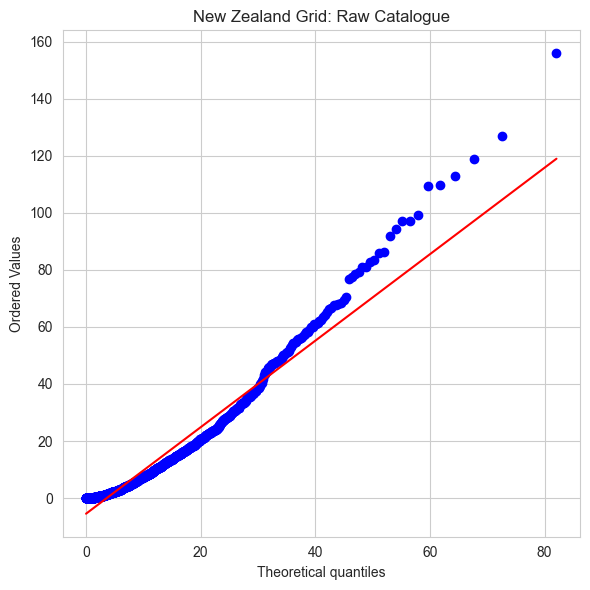

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import probplot

x = df_compare['inter_arrival'].dropna()
loc, scale = expon.fit(x)

plt.figure(figsize=(6, 6))
probplot(x, dist=expon, sparams=(loc, scale), plot=plt)
plt.title("New Zealand Grid: Raw Catalogue")
plt.tight_layout()
plt.savefig("qq_new_zealand_raw_data.png", dpi=300)
plt.show()

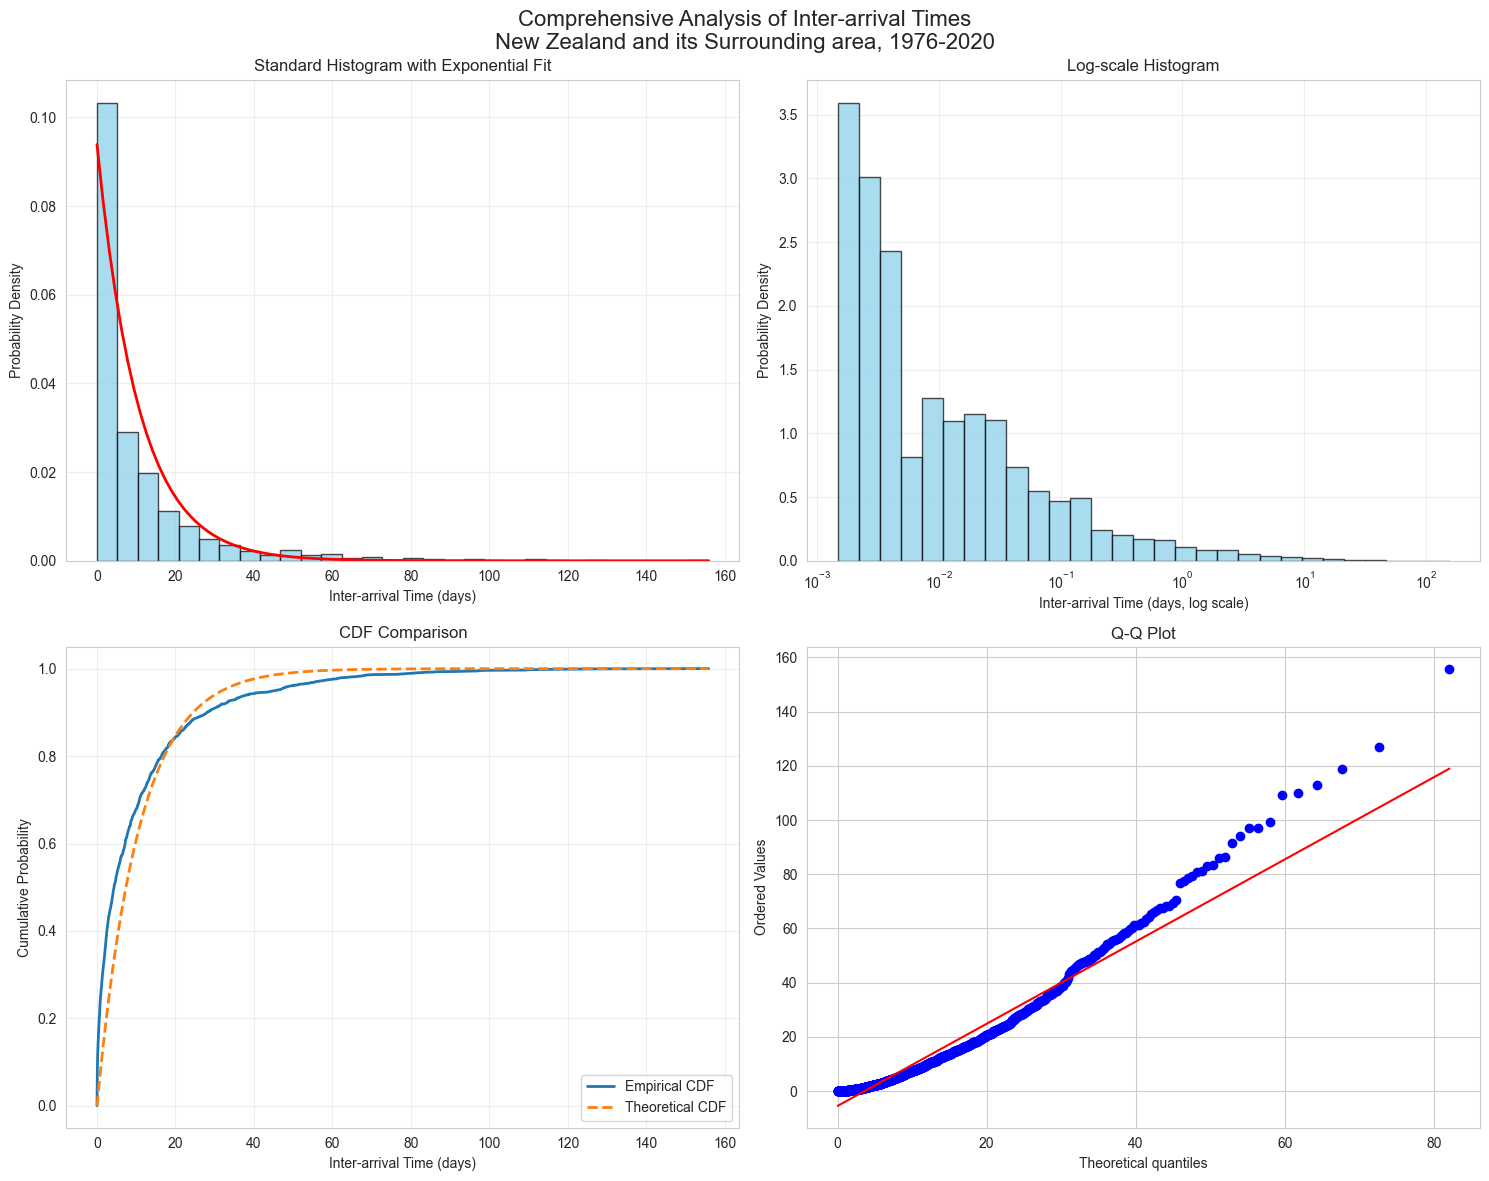

In [16]:
# Comprehensive analysis for the raw catalogue
import numpy as np
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Standard Histogram with Exponential Fit (Top-Left)
axes[0, 0].hist(x, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x_range = np.linspace(x.min(), x.max(), 100)
axes[0, 0].plot(x_range, expon.pdf(x_range, loc, scale), 'r-', lw=2)
axes[0, 0].set_title('Standard Histogram with Exponential Fit')
axes[0, 0].set_xlabel('Inter-arrival Time (days)')
axes[0, 0].set_ylabel('Probability Density')
axes[0, 0].grid(True, alpha=0.3)

# Log-scale Histogram (Top-Right)
bins = np.logspace(np.log10(x.min()), np.log10(x.max()), 30)
axes[0, 1].hist(x, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].set_xscale('log')
axes[0, 1].set_title('Log-scale Histogram')
axes[0, 1].set_xlabel('Inter-arrival Time (days, log scale)')
axes[0, 1].set_ylabel('Probability Density')
axes[0, 1].grid(True, alpha=0.3)

# CDF Comparison (Bottom-Left)
x_sorted = np.sort(x)
y_ecdf = np.arange(1, len(x_sorted)+1) / len(x_sorted)
y_theoretical = expon.cdf(x_sorted, loc, scale)
axes[1, 0].plot(x_sorted, y_ecdf, label='Empirical CDF', linewidth=2)
axes[1, 0].plot(x_sorted, y_theoretical, label='Theoretical CDF', linestyle='--', linewidth=2)
axes[1, 0].set_title('CDF Comparison')
axes[1, 0].set_xlabel('Inter-arrival Time (days)')
axes[1, 0].set_ylabel('Cumulative Probability')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Q-Q Plot (Bottom-Right)
probplot(x, dist=expon, sparams=(loc, scale), plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot')

plt.savefig('comprehensive_analysis_new_zealand_raw.png', dpi=300, bbox_inches='tight')
plt.suptitle('Comprehensive Analysis of Inter-arrival Times\nNew Zealand and its Surrounding area, 1976-2020', fontsize=16)
plt.tight_layout()
plt.show()

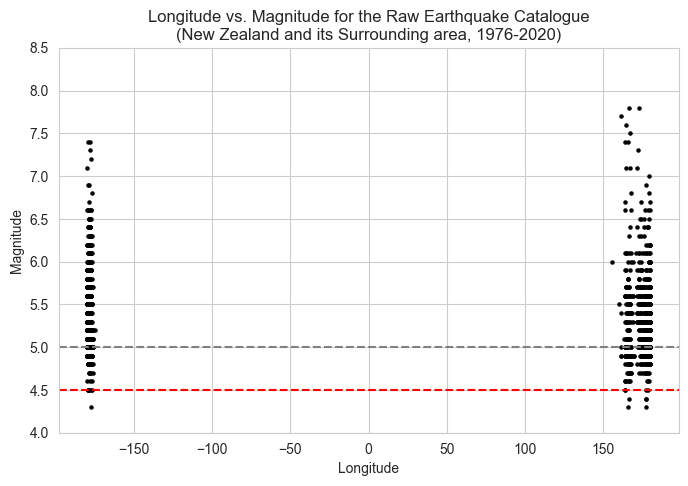

In [17]:
# Lon vs Mag
import matplotlib.pyplot as plt

x = df_compare['Lon']
y = df_compare['Mag']

plt.figure(figsize=(8, 5))
plt.ylim(4,8.5)
plt.scatter(x, y, s=5, color='black')
plt.axhline(y=4.5, color='red', linestyle='--')  # Observing the minor magnitude(<4.5) events for comparison
plt.axhline(y=5, color='grey', linestyle='--')  # Observing the minor magnitude events(<5) for comparison
plt.xlabel("Longitude")
plt.ylabel("Magnitude")
plt.title("Longitude vs. Magnitude for the Raw Earthquake Catalogue\n(New Zealand and its Surrounding area, 1976-2020)")
plt.show()

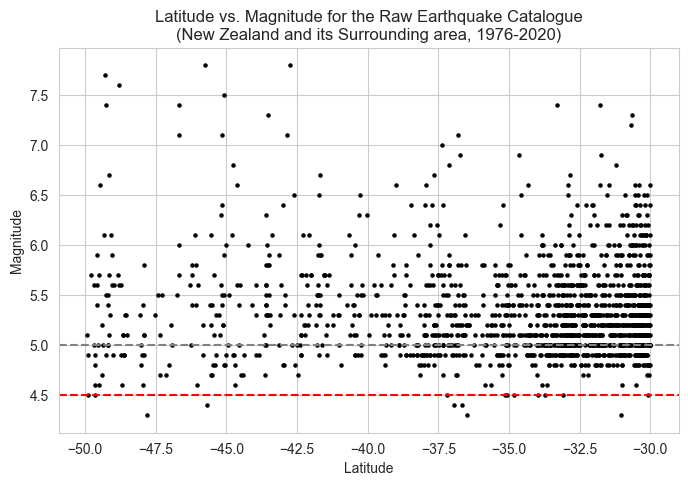

In [4]:
# Lat vs Mag
import matplotlib.pyplot as plt

x = df_compare['Lat']
y = df_compare['Mag']

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=5, color='black')
plt.axhline(y=4.5, color='red', linestyle='--')  # Observing the minor magnitude(<4.5) events for comparison
plt.axhline(y=5, color='grey', linestyle='--')  # Observing the minor magnitude events(<5) for comparison
plt.xlabel("Latitude")
plt.ylabel("Magnitude")
plt.title("Latitude vs. Magnitude for the Raw Earthquake Catalogue\n(New Zealand and its Surrounding area, 1976-2020)")
plt.savefig('lat_mag_raw_newzealand.png', dpi=300)
plt.show()

In [19]:
# KS test
# If p_value > 0.05, we cannot reject the hypothesis that inter-arrival times are exponential.
# This is consistent with a Poisson process.
from scipy.stats import kstest, expon

x = df_compare['inter_arrival'].dropna()
loc, scale = expon.fit(x)
star, p_value = kstest(x, 'expon', args=(loc, scale))

print(f"K-S test p-value: {p_value:.8f}")

Region = "New Zealand and its surrounding area"
if p_value > 0.05:
    print(f"The inter-arrival time between neighbour earthquake events in the raw catalog of {Region} follows a Poisson process.")
else:
    print(f"The inter-arrival time between neighbour earthquake events in the raw catalog of {Region} does not follow a Poisson process.")

K-S test p-value: 0.00000000
The inter-arrival time between neighbour earthquake events in the raw catalog of New Zealand and its surrounding area does not follow a Poisson process.


In [5]:
# Define the types of fault by rake
def classify_fault_type(rake):
    rake = float(rake)
    if -30 <= rake <= 30 or rake >= 150 or rake <= -150:
        return 'Strike-slip'
    elif 30 < rake < 150:
        return 'Reverse'
    elif -150 < rake < -30:
        return 'Normal'
    else:
        return 'Oblique'

In [6]:
# Apply the classify rule
df['fault_type'] = df['Rake'].apply(classify_fault_type)
print(df)

            Date    Lat     Lon  Depth  Mag  Strike  Dip  Rake        Time  \
0     1976/01/15 -30.38 -176.82   33.0  6.2     196   26    91  06:06:46.1   
1     1976/01/15 -30.15 -177.24   33.0  6.1     180   10    73  16:12:22.3   
2     1976/05/04 -44.64  167.57   19.0  6.6      57   18   136  13:56:29.9   
3     1976/06/29 -33.82 -177.83   48.0  6.1      24   37    78  18:30:09.1   
4     1976/07/31 -30.32 -177.96   20.0  6.2     196   31    93  00:46:58.0   
...          ...    ...     ...    ...  ...     ...  ...   ...         ...   
1537  2020/11/29 -31.86  179.20  462.5  5.3     115   35  -178  21:45:22.7   
1538  2020/12/10 -32.88 -179.85   96.0  5.9     139   25   175  20:42:08.3   
1539  2020/12/11 -32.91 -179.05   43.5  5.1     206   34   104  15:30:00.1   
1540  2020/12/18 -32.64 -178.84   35.7  5.1     198   32    97  20:49:15.8   
1541  2020/12/24 -32.05 -178.10   10.0  5.1     197   28    77  20:04:11.8   

                    Datetime   fault_type  
0    1976-01-15 06:

In [7]:
# Visualize the distribution of fault types in the world map
import plotly.express as px

# Define the color mapping
color_map = {
    'Reverse': 'red',
    'Strike-slip': 'green',
    'Normal': 'blue'
}
fig_fault_type = px.scatter_geo(df,
                                lat="Lat",
                                lon="Lon",
                                color="fault_type", opacity=0.6,
                                color_discrete_map=color_map,
                                hover_name="fault_type",
                                title='Fault Types in the Philippine Plate Grid(1976-2020)')

fig_fault_type.update_layout(width=1000,height=600)

fig_fault_type.show()